In [1]:
from because.synth import Reader
from because.probability import prob
from because.causality import cdisc
from because.visualization import cmodel

Read in dataset

In [2]:
filename = "models/llcp.csv"
# ds = Reader(filename, limit=10000)
ds = Reader(filename)
varNames = ds.getSeriesNames()

getData:  290759 records read.


Mark variable types

In [3]:
numeric = ['age', 'weight', 'height', 'bmi']
discreteNum = ['ageGroup', 'income', 'sleephours', 'drinks']
catVars = [i for i in varNames if i not in (numeric+discreteNum)]

In [4]:
catVars

['gender',
 'genhealth',
 'asthma_ever',
 'asthma',
 'skincancer',
 'othercancer',
 'copd',
 'arthritis',
 'depression',
 'kidneydis',
 'diabetes',
 'maritaldetail',
 'married',
 'education',
 'veteran',
 'state',
 'childcnt',
 'employment',
 'smokertype',
 'physicalactivity',
 'insurance',
 'checkup',
 'nohospitalcost',
 'bmicat']

Create a probspace with the categorical variables marked as such (important for some to be treated as categorical and not discrete numeric).

In [5]:
ps = prob.ProbSpace(ds.varData, categorical=catVars)

Throwing all variables in is a bad idea; need to isolate categorical.

In [6]:
# cdisc.discover(ps)

Trying to throw all the cat variables in is still far too much; better off doing a select number at a time.  Limiting the read in to initialize ds helps a little with speed, but seems to throw some strange errors with dependency. Removing the limit seems to remove the errors.

In [7]:
# cdisc.discover(ps, varNames=catVars)

Test direction appropriately calls UCM for the two variables, returns rho value and identifiability.

In [8]:
ps.testDirection('gender', 'genhealth')


	Testing gender -> genhealth direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:0.0
Rho-value: 0.0
identifiable: False


0.0

In [9]:
ps.testDirection('gender', 'arthritis')


	Testing gender -> arthritis direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:0.0
Rho-value: 0.0
identifiable: False


0.0

In [10]:
ps.testDirection('arthritis', 'ageGroup')


	Testing arthritis -> ageGroup direction
Using ANM test...


0.09424524027970939

In [11]:
ps.testDirection('genhealth', 'ageGroup')


	Testing genhealth -> ageGroup direction
Using ANM test...


0.007960454624064564

    cmodel.show: Performing Discovery.
Pass 1 of 3
    ageGroup -- gender are independent
Pass 2 of 3
    ageGroup -- bmicat is blocked by ('arthritis',)
      conflicts resolved:  [(0.13255512897523625, ('ageGroup', 'depression', ('bmicat',))), (0.2947662905273777, ('ageGroup', 'bmicat', ('depression',))), (0.3125754111577419, ('bmicat', 'depression', ('ageGroup',)))]
    ageGroup -- depression is blocked by ('bmicat',)
      conflicts resolved:  [(0.3113418851192863, ('ageGroup', 'bmicat', ('gender',))), (0.347718335927517, ('bmicat', 'gender', ('ageGroup',)))]
    ageGroup -- bmicat is blocked by ('gender',)
    ageGroup -- depression is blocked by ('gender',)
    arthritis -- gender is blocked by ('ageGroup',)
      conflicts resolved:  [(0.3625660001978295, ('bmicat', 'gender', ('arthritis',))), (0.4314761560642067, ('arthritis', 'gender', ('bmicat',)))]
    bmicat -- gender is blocked by ('arthritis',)
    arthritis -- gender is blocked by ('depression',)
    bmicat -- depression

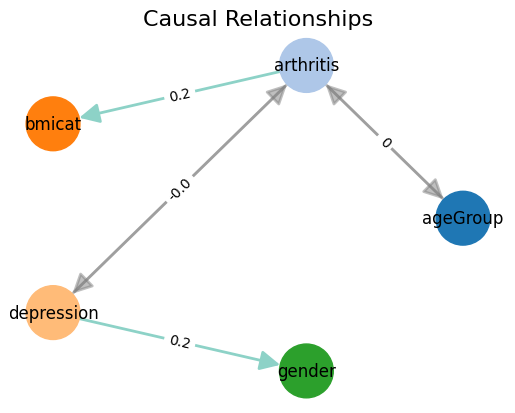

In [12]:
cmodel.show(probspace=ps, targetSpec=['arthritis', 'ageGroup', 'gender', 'bmicat', 'depression'], edgeLabels='rho' )


Code chunk below throws an error described earlier regardless of limit; doesn't like some interaction with dependence testing?

    cmodel.show: Performing Discovery.
Pass 1 of 3
    gender -- genhealth are independent
Pass 2 of 3


/Library/Python/3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


0.7435275458130514
0.7514361449874603
      conflicts resolved:  [(0.18297862754345923, ('drinks', 'physicalactivity', ('genhealth',))), (0.3034432971444816, ('drinks', 'genhealth', ('physicalactivity',)))]
    drinks -- physicalactivity is blocked by ('genhealth',)
Pass 3 of 3


AttributeError: 'NoneType' object has no attribute 'N'

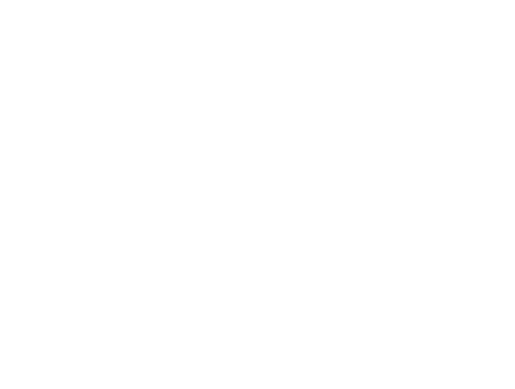

In [13]:
cmodel.show(probspace=ps, targetSpec=['genhealth', 'gender', 'drinks','physicalactivity'], edgeLabels='rho')


Discovery works ok with just a couple variables. May try to do discovery by just running through pairs with testDirection though.

In [14]:
cdisc.discover(ps, varNames=['physicalactivity', 'gender'])

Pass 1 of 3
Pass 2 of 3
Pass 3 of 3
Detecting valid links.

	Testing physicalactivity -> gender direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:0.0
Rho-value: 0.0
identifiable: False
triangles =  []
  cdisc.discover: found causal link: gender -> physicalactivity ( -0.0 )
  cDisc.discover: Duration =  2.4


Try with subspace. Condition across each age group; test gender and arthritis for each age group.

In [15]:
ss = ps.SubSpace([('ageGroup', 1)])
ss.testDirection('gender', 'arthritis')


	Testing gender -> arthritis direction
Using UCM test...

	**P-values** 
Forward: 3.08708614227271e-11 
Backward:0.0251559686680477
Rho-value: -0.02515596863717684
identifiable: False


-0.02515596863717684

In [17]:
# ageGroup values: {1,2,3,4,5,6}
for i in range(6):
    ss = ps.SubSpace([('ageGroup', i+1)])
    rho= ss.testDirection('gender', 'arthritis')
    print(rho, id)


	Testing gender -> arthritis direction
Using UCM test...

	**P-values** 
Forward: 3.08708614227271e-11 
Backward:0.0251559686680477
Rho-value: -0.02515596863717684
identifiable: False
-0.02515596863717684 <built-in function id>

	Testing gender -> arthritis direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:4.9960036108132044e-15
Rho-value: -4.9960036108132044e-15
identifiable: False
-4.9960036108132044e-15 <built-in function id>

	Testing gender -> arthritis direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:0.0
Rho-value: 0.0
identifiable: False
0.0 <built-in function id>

	Testing gender -> arthritis direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:0.0
Rho-value: 0.0
identifiable: False
0.0 <built-in function id>

	Testing gender -> arthritis direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:0.0
Rho-value: 0.0
identifiable: False
0.0 <built-in function id>

	Testing gender -> arthritis direction
Using UCM test...

	

Seems like conditioning on ageGroup using subspace yields an unidentifiable relationship except in group 6. In this oldest group, gender -> arthritis is correctly identified.